> ## 웹 데이터를 가져오는 Beautiful Soap
 - 웹사이트에서 가져온 텍스트 형태의 데이터에서 원하는 html 태그를 추출하기 위해서  
   '뷰티풀 수프'가 필요함
 - html을 수프객체로 만들어서 추출하기 쉽게 만들어줌.
 
 - Beautiful Soap 라이브러리 설치

In [1]:
!pip install beautifulsoup4

 - Beautiful Soap 라이브러리 import

In [14]:
from bs4 import BeautifulSoup

 - 파일로 다운받은 test_first.html을 읽는다.
 - open 명령으로 읽기 옵션('r')을 주고 읽으면 된다.
 - soup.prettify()라는 옵션을 사용하면 들여쑤기가 되어 보기 좋게 표시된다.

In [23]:
filePath = './test_first.html'
page = open(filePath, 'r').read()

# 수프 객체 생성
soup = BeautifulSoup(page, 'html.parser')
#soup.prettify()
soup

<!DOCTYPE html>

<html>
<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
</html>

 - html 코드를 soup라는 변수에 저장했는데, 그 soup라는 변수에서
 - 한 단계 아래에서 포함된 태그들을 알고 싶으면 children 이라는 속성을 사용하면 된다.
 - 다음의 ~까지 태그들이 표시된다.

In [20]:
list(soup.children)

['html',
 '\n',
 <html>
 <head>
 <title>Very Simple HTML Code by PinkWink</title>
 </head>
 <body>
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>
 </body>
 </html>]

 - soup는 문서 전체를 저장한 변수이기 때문에 그 안에서 html 태그에 접속하려면  
   다음과 같은 형태로 해야한다.

In [24]:
html = list(soup.children)[2] # [0]- 'html', [1]-'\n', [2]-'<html> ~ </html>'
html

<html>
<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
</html>

 - 위에서 구한 html의 children을 조사해보면 다음과 같이 나타난다.

In [25]:
list(html.children)

['\n',
 <head>
 <title>Very Simple HTML Code by PinkWink</title>
 </head>,
 '\n',
 <body>
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>
 </body>,
 '\n']

 - 우리가 본문으로 흔히보게 되는 부분이 body 태그의 내용
 - 다시 html의 children을 3번을 조사해보면 body 태그가 나타남.

In [26]:
body = list(html.children)[3]
body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

 - 위와 같이 여러번 걸쳐서 body를 찾을 수 있지만 다음과 같이 한번에 찾을 수도 있다.

In [27]:
soup.body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

 - 또는 다음과 같은 방식으로 찾을 수도 있다.
 

In [28]:
list(body.children)

['\n',
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>,
 '\n',
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 '\n',
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>,
 '\n']

 - 또한 body 태그 안에 children의 리스트를 확인할 수 있다.
 - 위 코드에서 접근한 대로 단계별로 접근하고 다시 그 구조를 코드 속에 담아두는 것은 체계적으로  
   생각하고 접근할 수 있는 장점이 있지만, 복잡하고 큰 크기의 페이지를 접근하는 것에는 쉽지않다.  
   만약 접든해야할 태그를 알고 있다면 find나 find_all 명령을 많이 사용한다.
 - 다음은 모든 p 태그를 찾는 명령이다.

In [29]:
soup.find_all('p')

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>,
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>,
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

 - 하나만 찾을 때는 find 명령을 사용할 수 있다. 처음으로 나타나는 태그를 찾는다.

In [30]:
soup.find('p')

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

 - 다음과 같이 하면 p태그 중에서 클래스 이름이 outer-text 요소를 찾아준다.
 

In [33]:
soup.find_all('p', class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

 - 전체에서 class이름으로 outer-text를 찾을 수도 있다.

In [34]:
soup.find_all(class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

 - id가 first인 태그를 찾을 수도 있다.

In [35]:
soup.find_all(id = 'first')

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>]

 - find 명령은 맨 처음 나타난 태그만 찾아주기 때문에 그 다음 태그를 찾을 때는  
   다른 방법을 써야한다. 다음은 head에 있는 내용이다. 여기서 next_sibiling이라는   
   명령을 사용할 수 있다.

In [38]:
soup.head

<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>

 - '\n' 결과는 head 다음에 줄바꿈 문자가 있기 때문이다.

In [37]:
soup.head.next_sibling

'\n'

 - 다시 한 번 next_sibling

In [39]:
soup.head.next_sibling.next_sibling

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

 - body.p

In [42]:
# soup.head.next_sibling.next_sibling
body.p

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

 - body 태그의 맨 처음 나오는 p 태그에 next_sibling을 두번 걸면 그 다음 p 태그로 이동할 수 있다.

In [43]:
body.p.next_sibling.next_sibling

<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>

 - 다음과 같이 get_text() 명령으로 특정 태그 안에 있는 텍스트만 가지고 올 수 있다.
 - 각 p 태그 안의 내용만 갖고 온다.

In [44]:
for each_tag in soup.find_all('p'):
    print(each_tag.get_text())


                Happy PinkWink.
                PinkWink


                Happy Data Science.
                Python



                Data Science is funny.
            



                All I need is Love.
            



 - body 전체에서 get_text()를 하면 태그가 있던 자리는 줄바꿈('\n')이 표시되고 전체 텍스트를 보여준다.

In [45]:
body.get_text()

'\n\n\n                Happy PinkWink.\n                PinkWink\n\n\n                Happy Data Science.\n                Python\n\n\n\n\n                Data Science is funny.\n            \n\n\n\n                All I need is Love.\n            \n\n'

 - 클릭 가능한 링크를 의미하는 a 태그를 찾기

In [46]:
links = soup.find_all('a')
links

[<a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>,
 <a href="https://www.python.org" id="py-link">Python</a>]

 - links에서 href 속성을 찾으면 링크 주소를 얻을 수 있다.

In [48]:
for each in links:
    href = each['href']
    text = each.string
    print(text + '->' + href)

PinkWink->http://www.pinkwink.kr
Python->https://www.python.org


> # 크롬 개발자 도구를 이용해서 원하는 태그 찾기
 - 웹 페이지의 태그를 beautiful soup의 결과만 보면서 확인할 수는 없다.
 - 원하는 곳의 태그가 무엇인지 확인하는 방법 중 크롬의 개발자 도구를 가용하는 방법이 있다.
 - 일단 다음 사이트로 접속해서 미국 USB 1,427.00원 이라는 글자에서 확율을 가져오려고 한다.
 - https://finance.naver.com/marketindex/
 - 위 사이트로 접근해서 개발자 도구를 열어보면 1,427.00원 엘리먼트가 span 태그의 클래스 이름이 value라는 것을 알 수 있다.

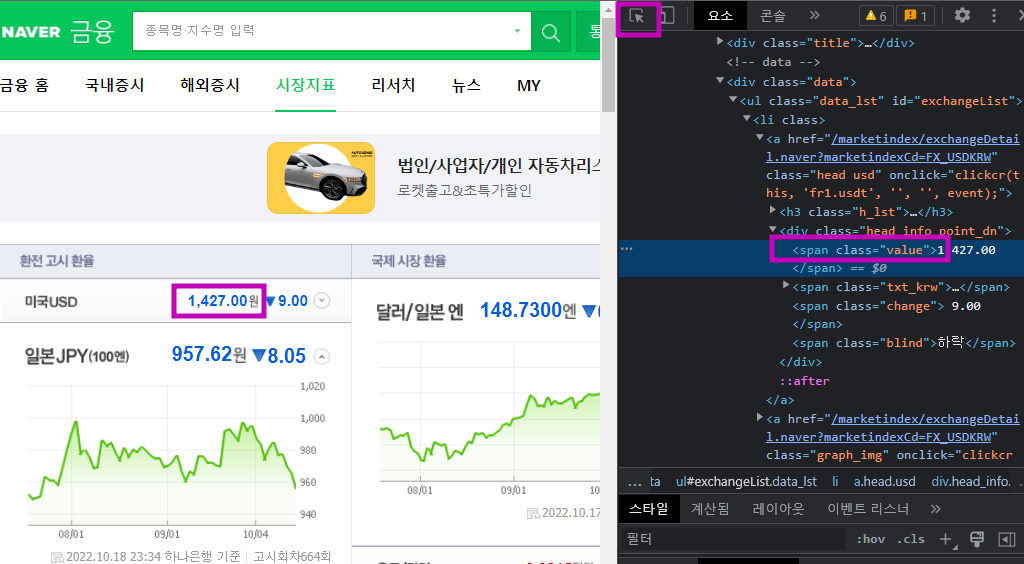

In [51]:
# 다음과 같은 형태로 Markdown 셀에 이미지를 첨부할 수 있다.
from PIL import Image # Pillow
filePath2 = './crawling1.png'
Image.open(filePath2)

In [54]:
# urllib 패키지 : 인터넷 리소스 가져오는 역할
# url 핸들링 라이브러리 import
# url로 접근하는 경우 urllib에서 urlopen이라는 함수를 import
from urllib.request import urlopen

 - 이제 해당 페이지를 읽어오자. 읽어온 내용이 많아서 prettify()로 print()를 해도 사실 확인하기는 쉽지 않다.

In [55]:
url = 'https://finance.naver.com/marketindex/'
page = urlopen(url) # page type : http.client.HTTPResponse
soup = BeautifulSoup(page, 'html.parser')

print(soup.prettify())

<script language="javascript" src="/template/head_js.naver?referer=info.finance.naver.com&amp;menu=marketindex&amp;submenu=market">
</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20221019125813/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript">
</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20221019125813/js/jindo.1.5.3.element-text-patch.js" type="text/javascript">
</script>
<div id="container" style="padding-bottom:0px;">
 <div class="market_include">
  <div class="market_data">
   <div class="market1">
    <div class="title">
     <h2 class="h_market1">
      <span>
       환전 고시 환율
      </span>
     </h2>
    </div>
    <!-- data -->
    <div class="data">
     <ul class="data_lst" id="exchangeList">
      <li class="on">
       <a class="head usd" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
        <h3 class="h_lst">
         <span class="blind">
          미국 U

 - 위 그림에서 접근해야 할 태그를 알아 두었으니 다음과 같이 접근하자.
 - find_all로 찾고 리스트로 결과가 반환되므로 첫번째를 선택

In [56]:
soup.find_all('span', 'value')[0].string

'1,440.70'

> # 절대 경로와 상대 경로 알아보기

 > ## urllib.parse.urljoin
 
 - 절대경로 : 전체경로('https://www.naver.com/')
 - 상대경로 : 특정 위치를 기준으로 경로 (/ or //로 시작하는 url)
 - urljoin : 상대경로를 절대경로로 변환하는 함수

In [58]:
from urllib.parse import urljoin

baseUrl = 'http://www.example.com/html/a.html'

# urljoin 첫번째 매개변수에 두번째 경로를 연결 
print(urljoin(baseUrl, 'b.html'))
print(urljoin(baseUrl, 'sub/c.html'))
print(urljoin(baseUrl, '../index.html'))
print(urljoin(baseUrl, '../image/a.html'))
print(urljoin(baseUrl, '../css/style.html'))
print()



http://www.example.com/html/b.html
http://www.example.com/html/sub/c.html
http://www.example.com/index.html
http://www.example.com/image/a.html
http://www.example.com/css/style.html

